# Лабораторная работа 1, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий

### a. Набор данных для классификации: Shelter Animal Outcomes

Датасет Shelter Animal Outcomes (https://www.kaggle.com/c/shelter-animal-outcomes/overview) содержит информацию о животных, находящихся в приютах, и их судьбах. В данной задаче классификации цель состоит в прогнозировании, будет ли животное усыновлено (adoption) или нет. Решение этой задачи поможет приютам заранее оценивать шансы на усыновление, что позволит улучшить процесс управления, разработать персонализированные стратегии для животных с низкой вероятностью усыновления и повысить общий уровень успешных пристройств.

Набор содержит категориальные (вид животного, пол, цвет) и числовые (возраст) признаки, что делает его подходящим для изучения методов обработки различных типов данных.

### b. Датасет для задачи регрессии: King County House Sales

Для задачи регрессии лучше подойдёт датасет King County House Sales (https://www.kaggle.com/harlfoxem/housesalesprediction), содержащий данные о продажах недвижимости в округе Кинг, штат Вашингтон, США. Датасет включает такие параметры, как цена недвижимости, количество комнат, площадь дома и участка, год постройки, местоположение и другие характеристики.

Цель регрессии — предсказать цену дома на основе его характеристик.

Этот анализ поможет:
- Владельцам недвижимости правильно оценить стоимость своего дома перед продажей.
- Покупателям понять, какие характеристики влияют на стоимость жилья.
- Агентствам недвижимости изучить рыночные тренды и улучшить свои прогнозы.
- Датасет содержит как числовые (площадь, количество комнат), так и категориальные (местоположение, класс дома) признаки, что позволяет изучать различные подходы к предобработке данных и построению моделей.



### c. Выбор метрик качества и обоснование

**Для классификации (Shelter Animal Outcomes):**

1. Accuracy (доля правильно классифицированных объектов):

- Используется как базовая метрика для оценки общей точности модели.
- Обоснование: учитывая многоклассовую классификацию, accuracy дает общее представление о правильности предсказаний.

2. Recall (полнота):

- Показывает, какая доля объектов каждого класса была корректно предсказана.
- Обоснование: Важно для задач, где критично распознать как можно больше объектов определенного класса (например, предотвратить эвтаназию животных).

3. Precision (точность):

- Показывает, какая доля объектов, отнесенных моделью к определенному классу, действительно принадлежит этому классу.
- Обоснование: важно для минимизации ложных положительных результатов (например, неверная классификация животных как adoptable).

4. F1-score (взвешенное среднее Precision и Recall):

- Учитывает баланс между полнотой (Recall) и точностью (Precision).
- Обоснование: в данном случае важно минимизировать ошибки в редких классах (например, euthanasia), так как это может иметь серьезные последствия.

5. Confusion Matrix:

- Визуализирует, какие классы путаются моделью.
- Обоснование: позволяет детально анализировать производительность модели по каждому классу.

**Для регрессии (King County House Sales):**

1. Mean Absolute Error (MAE):

- Вычисляет среднюю абсолютную ошибку предсказания.
- Обоснование: простая и интерпретируемая метрика, показывает, насколько в среднем модель ошибается в предсказаниях.

2. Mean Squared Error (MSE):

- Среднеквадратичная ошибка.
- Обоснование: штрафует большие отклонения сильнее, чем MAE, что важно, если существенные ошибки имеют больший вес.

3. R² Score (коэффициент детерминации):

- Показывает долю дисперсии зависимой переменной, объясненную моделью.
- Обоснование: удобен для оценки того, насколько хорошо модель объясняет данные.

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

Сделаем предобработку данных

In [2]:
# Загрузка данных
shelter_data = pd.read_csv('./shelter_animal_outcomes/train.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [3]:
# Инициализация и обучение KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_shelter, y_train_shelter)

KNeighborsClassifier()

Оценка качества модели

Accuracy: 0.73
F1 Score: 0.67
Recall: 0.66
Precision: 0.68


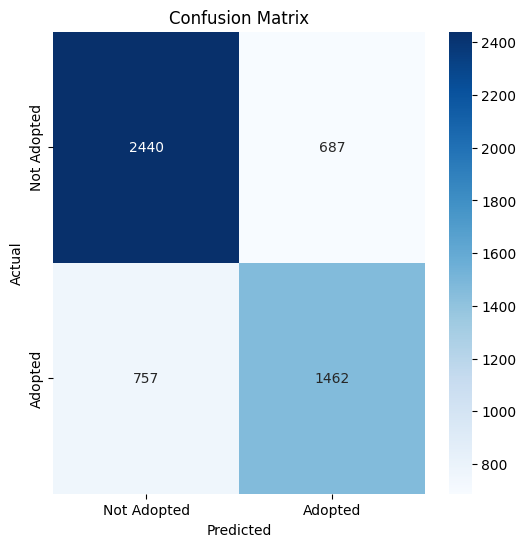

In [4]:
# Предсказание
y_pred_shelter = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy = accuracy_score(y_test_shelter, y_pred_shelter)
f1 = f1_score(y_test_shelter, y_pred_shelter)
recall = recall_score(y_test_shelter, y_pred_shelter)
precision = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [9]:
# Загрузка данных
house_data = pd.read_csv('./kc_house_data/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [10]:
# Инициализация и обучение KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_house, y_train_house)

KNeighborsRegressor()

Оценка качества модели

In [11]:
# Предсказание
y_pred_house = knn_reg.predict(X_test_house)

# Метрики качества
mae = mean_absolute_error(y_test_house, y_pred_house)
mse = mean_squared_error(y_test_house, y_pred_house)
r2 = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 141845.63136710617
Mean Squared Error (MSE): 52000476114.3992
R-squared (R^2): 0.6560285288778613


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: нормализация или стандартизация

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Улучшение предобработки данных (масштабирование и нормализация)

In [ ]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Повторное обучение модели на масштабированных данных
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики для масштабированных данных
y_pred_shelter_scaled = knn_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Улучшение: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1:.2f}")

Улучшение: масштабирование
Accuracy: 0.69
F1 Score: 0.62
Recall: 0.62
Precision: 0.62

Сравнение с бейзлайном:
Разница в Accuracy: -0.04
Разница в F1 Score: -0.05


2. Формирование новых признаков

In [7]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_shelter, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = knn_clf.predict(X_test_shelter)
accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Улучшение: добавление нового признака (AgeInDays)")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1:.2f}")

Улучшение: добавление нового признака (AgeInDays)
Accuracy: 0.73
F1 Score: 0.67

Сравнение с бейзлайном:
Разница в Accuracy: 0.00
Разница в F1 Score: 0.00


3. Подбор гиперпараметров

In [19]:
# Масштабирование данных
scaler = StandardScaler()
X_train_shelter = scaler.fit_transform(X_train_house)
X_test_shelter = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_neighbors': range(1, 5),
    'weights': ['uniform', 'distance']
}

# Grid Search с 5-кратной кросс-валидацией
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_knn.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

print("Улучшение: подбор гиперпараметров (Grid Search)")
print(f"Accuracy: {f1_best:.2f}")
print(f"F1 Score: {accuracy_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1:.2f}")


Лучшие параметры: {'n_neighbors': 3, 'weights': 'distance'}
Лучшая кросс-валидация: 0.61

Улучшение: подбор гиперпараметров (Grid Search)
Accuracy: 0.62
F1 Score: 0.69
Recall: 0.61
Precision: 0.63

Сравнение с бейзлайном:
Разница в Accuracy: 0.00
Разница в F1 Score: 0.00


### b.2 Проверка гипотез для задачи регрессии

1. Улучшение предобработки данных (масштабирование и нормализация)

In [50]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = knn_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
mse_scaled = mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Улучшение: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Mean Squared Error (MSE): {mse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae:.2f}")
print(f"Разница в MSE: {mse_scaled - mse:.2f}")
print(f"Разница в R^2: {r2_scaled - r2:.2f}")

Улучшение: масштабирование
Mean Absolute Error (MAE): 141565.02
Mean Squared Error (MSE): 51714426150.63
R-squared (R^2): 0.66

Сравнение с бейзлайном:
Разница в MAE: -280.61
Разница в MSE: -286049963.76
Разница в R^2: 0.00


2. Формирование новых признаков

In [ ]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = knn_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
mse_new_feature = mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Улучшение: добавление нового признака (total_area)")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Mean Squared  Error (MSE): {mse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae:.2f}")
print(f"Разница в MSE: {mse_new_feature - mse:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2:.2f}")

Улучшение: добавление нового признака (total_area)
Mean Absolute Error (MAE): 131738.85
Mean Squared  Error (MSE): 48977178393.78
R-squared (R^2): 0.68

Сравнение с бейзлайном:
Разница в MAE: -10106.78
Разница в MSE: -3023297720.62
Разница в R^2: 0.02


3. Подбор гиперпараметров

In [20]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

# Подбор гиперпараметров
param_grid = {
    'n_neighbors': range(1, 5),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train_house, y_train_house)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая кросс-валидация: ", grid_search.best_score_)
print()

# Лучшие параметры и метрики
best_reg = grid_search.best_estimator_
y_pred_house_gs = best_reg.predict(X_test_house)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

print("Улучшение: подбор гиперпараметров (Grid Search)")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae:.2f}")
print(f"Разница в R^2: {r2_gs - r2:.2f}")

Лучшие параметры:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Лучшая кросс-валидация:  0.6979072939015201

Улучшение: подбор гиперпараметров (Grid Search)
Mean Absolute Error (MAE): 127483.20
R-squared (R^2): 0.68

Сравнение с бейзлайном:
Разница в MAE: -14362.43
Разница в R^2: 0.02


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, 'n_neighbors': 3, 'weights': 'distance'

В улучшенном бейзлайне для регрессии добавим масштабирование, 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'

Классификация

In [101]:
# Загрузка данных
shelter_data = pd.read_csv('./shelter_animal_outcomes/train.csv')

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

knn_clf = KNeighborsClassifier(n_neighbors=3, weights="distance")

Регрессия

In [29]:
# Загрузка данных
house_data = pd.read_csv('./kc_house_data/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

knn_reg = KNeighborsRegressor(n_neighbors=4, weights="distance", metric="manhattan")

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [102]:
knn_clf.fit(X_train_shelter, y_train_shelter)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Регрессия

In [30]:
knn_reg.fit(X_train_house, y_train_house)

KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='distance')

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [103]:
# Предсказание
y_pred_shelter_best = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy_best: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")

Accuracy_best: 0.68
F1 Score: 0.62
Recall: 0.61
Precision: 0.62


Регрессия

In [34]:
# Предсказание
y_pred_house_best = knn_reg.predict(X_test_house)

# Метрики качества
mae_best = mean_absolute_error(y_test_house, y_pred_house_best)
mse_best = mean_squared_error(y_test_house, y_pred_house_best)
r2_best = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"R-squared (R^2): {r2_best}")

Mean Absolute Error (MAE): 141363.29525972577
Mean Squared Error (MSE): 53212882813.68727
R-squared (R^2): 0.648008730846878


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [35]:
print(f"Разница в accuracy: {accuracy_best - accuracy}")
print(f"Разница в F1 Score: {f1_best - f1}")

Разница в accuracy: -0.04526748971193417
Разница в F1 Score: -0.05207392849244874


Регрессия

In [36]:
print(f"Разница в MAE: {mae_best - mae}")
print(f"Разница в MSE: {mse_best - mse}")
print(f"Разница в R^2: {r2_best - r2}")

Разница в MAE: -482.33610738039715
Разница в MSE: 1212406699.2880707
Разница в R^2: -0.008019798030983294


### g. Выводы

**Вывод по классификации:**

Внедрение улучшений не дало положительного эффекта, а, напротив, совсем незначительно, но ухудшило качество модели

**Вывод по регрессии:**

Улучшения понизии MAE, немного повысили R^2, однако повысили MSE

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

KNN для классификации

In [48]:
from scipy.spatial import distance
from collections import Counter
import numpy as np
import pandas as pd


class KNNClassifier:
    def __init__(self, k=5):
        """
        Инициализация классификатора K ближайших соседей.
        :param k: количество соседей для голосования.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Обучение модели — сохранение обучающих данных.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        self.X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

    def predict(self, X_test):
        """
        Предсказание меток для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные метки для тестовых данных.
        """
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
        
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Прогноз для одного примера.
        :param x: тестовый пример (вектор длины M).
        :return: предсказанная метка.
        """
        distances = distance.cdist(self.X_train, [x], 'euclidean').flatten()
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)

        return most_common[0][0]

KNN для регрессии

In [85]:
class KNNRegressor:
    def __init__(self, k=5, metric='euclidean', weights='uniform'):
        """
        Инициализация регрессора K ближайших соседей.
        
        :param k: количество ближайших соседей.
        :param metric: метрика расстояния ('euclidean', 'manhattan', и т.д.).
        :param weights: схема взвешивания ('uniform' или 'distance').
        """
        self.k = k
        self.metric = metric
        self.weights = weights

    def fit(self, X_train, y_train):
        """
        Обучение модели — сохранение обучающих данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        self.X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else np.array(y_train)

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных целевых значений.
        """
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)
        
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Прогноз для одного примера.
        
        :param x: тестовый пример (вектор длины M).
        :return: предсказанное значение.
        """
        # Вычисление расстояний до всех точек обучающего набора
        x = np.array(x).reshape(1, -1)
        distances = distance.cdist(self.X_train, x, metric=self.metric).flatten()

        # Определение индексов k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = distances[k_indices]
        k_nearest_labels = self.y_train[k_indices]

        # Взвешивание соседей
        if self.weights == 'uniform':
            # Равномерные веса: среднее значение
            return np.mean(k_nearest_labels)
        elif self.weights == 'distance':
            # Взвешивание по обратному расстоянию
            weights = 1 / (k_nearest_distances + 1e-10)  # Защита от деления на ноль

            return np.dot(weights, k_nearest_labels) / np.sum(weights)
        else:
            raise ValueError("Параметр weights должен быть 'uniform' или 'distance'.")

### b. Обучение имплементированной модели

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('./shelter_animal_outcomes/train.csv')
shelter_data = shelter_data.sample(frac=0.3, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

knn_clf = KNNClassifier(k=5)
knn_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [86]:
# Загрузка данных
house_data = pd.read_csv('./kc_house_data/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

knn_reg = KNNRegressor(k=5)
knn_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.74
F1 Score: 0.69
Recall: 0.70
Precision: 0.68


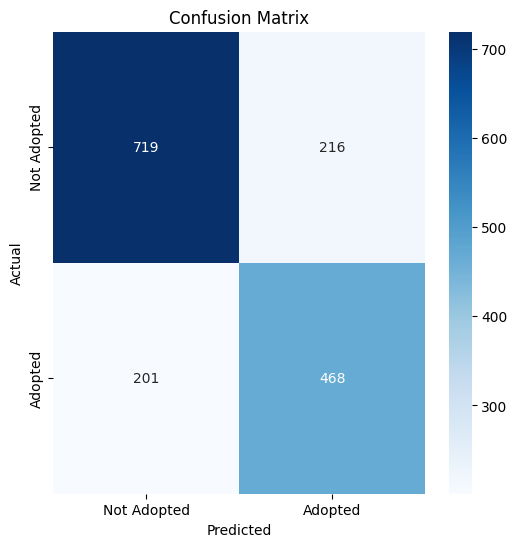

In [68]:
# Предсказание
y_pred_shelter = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_2 = accuracy_score(y_test_shelter, y_pred_shelter)
f1_2 = f1_score(y_test_shelter, y_pred_shelter)
recall_2 = recall_score(y_test_shelter, y_pred_shelter)
precision_2 = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_2:.2f}")
print(f"F1 Score: {f1_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"Precision: {precision_2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [81]:
# Предсказание
y_pred_house = knn_reg.predict(X_test_house)

# Метрики качества
mae_2 = mean_absolute_error(y_test_house, y_pred_house)
mse_2 = mean_squared_error(y_test_house, y_pred_house)
r2_2 = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_2}")
print(f"Mean Squared Error (MSE): {mse_2}")
print(f"R-squared (R^2): {r2_2}")

Mean Absolute Error (MAE): 141818.0729123294
Mean Squared Error (MSE): 51993851927.97934
R-squared (R^2): 0.6560723463833553


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [82]:
print(f"Разница в accuracy: {accuracy_2 - accuracy}")
print(f"Разница в F1 Score: {f1_2 - f1}")

Разница в accuracy: 0.010133429986574849
Разница в F1 Score: 0.0223820894552601


Регрессия

In [83]:
print(f"Разница в MAE: {mae_2 - mae}")
print(f"Разница в MSE: {mse_2 - mse}")
print(f"Разница в R^2: {r2_2 - r2}")

Разница в MAE: -27.558454776764847
Разница в MSE: -6624186.41986084
Разница в R^2: 4.381750549398156e-05


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась лучше, чем для встроенной модели

Ошибки имплементированной модели относительно немного уменьшились, R^2 остался практически идентичным

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('./shelter_animal_outcomes/train.csv')
shelter_data = shelter_data.sample(frac=0.3, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

knn_clf = KNNClassifier(k=3)

Регрессия

In [93]:
# Загрузка данных
house_data = pd.read_csv('./kc_house_data/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

knn_reg = KNNRegressor(k=4, weights="distance", metric="cityblock")

### g. Обучение на улучшенном бейзлайне

Классификация

In [89]:
knn_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [94]:
knn_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.66
F1 Score: 0.60
Recall: 0.60
Precision: 0.59


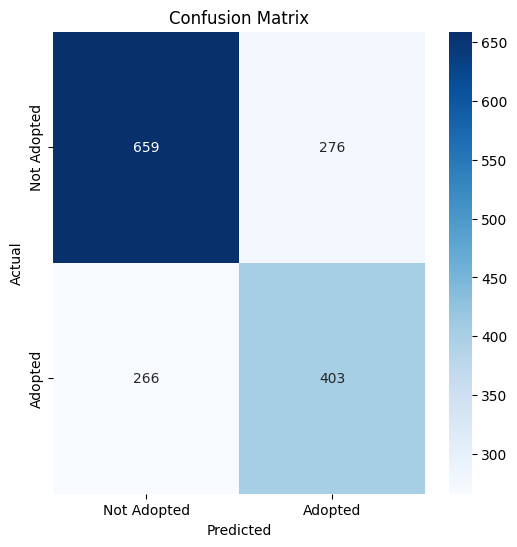

In [91]:
# Предсказание
y_pred_shelter_best = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_2_best = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_2_best = f1_score(y_test_shelter, y_pred_shelter_best)
recall_2_best = recall_score(y_test_shelter, y_pred_shelter_best)
precision_2_best = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_2_best:.2f}")
print(f"F1 Score: {f1_2_best:.2f}")
print(f"Recall: {recall_2_best:.2f}")
print(f"Precision: {precision_2_best:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [95]:
# Предсказание
y_pred_house_best = knn_reg.predict(X_test_house)

# Метрики качества
mae_2_best = mean_absolute_error(y_test_house, y_pred_house_best)
mse_2_best = mean_squared_error(y_test_house, y_pred_house_best)
r2_2_best = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_2_best}")
print(f"Mean Squared Error (MSE): {mse_2_best}")
print(f"R-squared (R^2): {r2_2_best}")

Mean Absolute Error (MAE): 141314.93703322028
Mean Squared Error (MSE): 53179234127.38285
R-squared (R^2): 0.6482313093498902


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [96]:
print(f"Разница в accuracy: {accuracy_2_best - accuracy_best}")
print(f"Разница в F1 Score: {f1_2_best - f1_best}")

Разница в accuracy: -0.02252925486508195
Разница в F1 Score: -0.01941714225678237


Регрессия

In [97]:
print(f"Разница в MAE: {mae_2_best - mae_best}")
print(f"Разница в MSE: {mse_2_best - mse_best}")
print(f"Разница в R^2: {r2_2_best - r2_best}")

Разница в MAE: -48.35822650548653
Разница в MSE: -33648686.30442047
Разница в R^2: 0.00022257850301210524


### j. Выводы

Точность имплементированной модели для задачи классификации оказалась немного хуже, чем для встроенной модели

Ошибки имплементированной модели относительно немного уменьшились, R^2 остался практически идентичным